# Week 11-12: Continuous Time Markov Chains

In the third chapter of the course, we focus on Continuous Time Markov Chains, which generalize the Poisson process and are a continuous-time analog of the Discrete Time Markov Chain studied in Chapter 1.

In this notebook, we will first focus on how to simulate these processes. 

In class, we have seen that we can define the process from the transition matrix $Q = (q_{i,j})$. Let's write down the transition matrix associated with the process described in Problem 4 of the homework: We have for this process $v_0=\lambda$, $v_1=\mu_1$ and $v_2=\mu_2$, $p_{0,1}=p$, $p_{0,2}=1-p$, $p_{1,2}=p_{2,1}=0$ and $p_{2,0}=p_{1,0}=1$. As an exercise, enter the values of the state space $S$ and corresponding transition matrix $Q$ for $p=0.5$, $\lambda=1$, $\mu_1=2$ and $\mu_2=3$.

In [ ]:
S = [0,1,2] # enter the state space
Q = [[-1, 0.5,0.5],[2 ,-2 , 0],[ 3,0 ,-3 ]]# enter the matrix Q
P = [[0,0.5,0.5],[1,0,0],[1,0,0]]# enter the matrix of p_{ij}

To simulate the process, we need to first simulate the time to the next jump and the state the process will jump to. Complete the following code to generate one trajectory of the process.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# specify global variables
N_traj = 1
nsteps = 10                # number of transitions to simulate
xstates = np.zeros(nsteps, dtype=int) # record the states
tjumps = np.zeros(nsteps)  # record the jump times
xstates[0] = 0             # initial state
tjumps[0] = 0              # initial time


# The following function simulates the process
def simulate_process(xstates, tjumps, nsteps):
    for tidx in range(nsteps - 1):
        current_state = xstates[tidx]
        # update the jump time array
        rate = -Q[current_state][current_state] #Enter the rate of the Exponential time of the next jump, as a function of Q
        tjumps[tidx + 1] = tjumps[tidx] + np.random.exponential(1 / rate)
        # update the next state as a function of P
        #see also https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
        xstates[tidx + 1] = np.random.choice(S, 1, p=P[current_state])
           
        
# use the function
simulate_process(xstates, tjumps, nsteps)
    
# plot of one trajectory
def current_state(tval, tjumps):
    for i in range(0, len(tjumps) - 1):
        if  tjumps[i] <= tval < tjumps[i + 1]:
            return xstates[i]
        
t = np.linspace(0, tjumps[-1] + 2, num=10000)
x = np.zeros(len(t))
for k in range(0, len(t)):
    x[k] = current_state(t[k], tjumps)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("t")
ax.set_ylabel("X(t)")
ax.plot(t, x)
plt.show()

By simulating the Markov chain over a long time, we can empirically obtain the stationary distribution of the process (if it exists) by extracting the average fraction of time spent in each state (cf. class). Run the following script to empirically estimate the stationary distribution

In [ ]:
nsteps = 10000
xstates = np.zeros(nsteps, dtype=int)
tjumps = np.zeros(nsteps) 
simulate_process(xstates, tjumps, nsteps)

# stationary distribution
pi = np.zeros(3)

# add the time intervals the process X(t) spends in each state
for tidx in range(nsteps - 1):
    if xstates[tidx] == 0:
        pi[0] += tjumps[tidx + 1] - tjumps[tidx]
    elif xstates[tidx] == 1:
        pi[1] += tjumps[tidx + 1] - tjumps[tidx]
    elif xstates[tidx] == 2:
        pi[2] += tjumps[tidx + 1] - tjumps[tidx]

# normalize stationary distribution pi
pi = pi / tjumps[nsteps - 1]

print("The empirical stationary distribution is pi =", pi, ".")

Compare these results with the theoretical stationary distribution:

In [ ]:
# enter the values of lambda, mu_1, mu_2 and p
lmbda = 1
mu1 = 2
mu2 = 3
p = 0.5


P = [1 / (1 + p*lmbda/mu1 + (1-p)*lmbda/mu2),
     p*lmbda/mu1 / (1 + p*lmbda/mu1 + (1-p)*lmbda/mu2),
     (1-p)*lmbda/mu2 / (1 + p*lmbda/mu1 + (1-p)*lmbda/mu2)] # ENTER the theoretical stationary distribution P

print("The theoretical stationary distribution is P =", P, ".")

# visually compare empirical with theoretical distr.
opacity = 0.4
bar_width = 0.35

plt.xlabel('k')
plt.ylabel('pi[k]')
plt.xticks(range(3),("0", "1", "2"))
plt.bar(np.arange(3)+ bar_width, pi, bar_width, align="center", alpha=opacity, color="b", label="empirical")
plt.bar(range(3), P, bar_width, align="center", alpha=opacity, color="r", label="theoretical")
plt.legend()
plt.tight_layout()
plt.show()

# Homework Problems

1. Simulate the chain corresponding with Problems 1-3. 

In [ ]:
# The Q matrix for problem 1 is given by
Q = [[-1,1/4,1/4,1/4,1/4],
     [1/4,-1,1/4,1/4,1/4],
     [1/4,1/4,-1,1/4,1/4],
     [1/4,1/4,1/4,-1,1/4],
     [1/4,1/4,1/4,1/4,-1]]
# This CTMC is easy to simulate without using the big Q matrix since it has a lot of symmetries 

In [ ]:
# Water lilies - Problem 1 

# It is equivalent to simulate a Markov chain on {1,...,5} with 
# the correct P matrix and a posteriori, by symmetry, to add the exponential times

import numpy as np
import matplotlib.pyplot as plt


# specify global variables
nsteps = 100               # number of transitions to simulate
xstates = np.zeros(nsteps) # record the states
tjumps = np.zeros(nsteps)  # record the jump times
xstates[0] = 0             # start from lily 0
tjumps[0] = 0              # initial time
rate = 1

nblilies = 5


for i in range(1,nsteps - 1):
    S = [i for i in range(nblilies)]
    S.remove(xstates[i-1])
    xstates[i] = np.random.choice(S) # choose the next lily

for i in range(1,nsteps - 1):
     tjumps[i + 1] = tjumps[i] + np.random.exponential(1 / rate) 
        

# plot the trajectory
def current_state(tval, tjumps):
    for i in range(0, len(tjumps) - 1):
        if  tjumps[i] <= tval < tjumps[i + 1]:
            return xstates[i]

t = np.linspace(0, tjumps[-1] + 2, num=10000)
x = np.zeros(len(t))
for k in range(0, len(t)):
    x[k] = current_state(t[k], tjumps)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("t")
ax.set_ylabel("X(t)")
ax.plot(t, x)
plt.show()

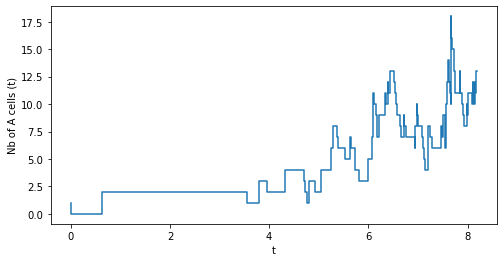

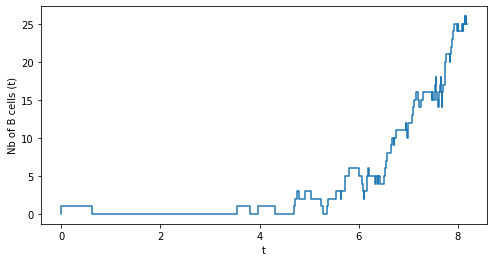

In [4]:
# A and B cells - Problem 2
# The Q matrix formalism is not great to 
# simulate this Markov chain since the state-space is infinite
# Instead we proceed as follows

import numpy as np
import matplotlib.pyplot as plt


# specify global variables
nsteps = 100               # number of transitions to simulate

alpha = 2
beta = 1

Acells_states = np.zeros(nsteps) # record the A cells in time
Bcells_states = np.zeros(nsteps) # record the B cells in time
tjumps = np.zeros(nsteps)        # record the jump times
Acells_states[0] = 1             # start from 1 A cells
Bcells_states[0] = 0             # start from 0 B cells
tjumps[0] = 0 


for step in range(1,nsteps):
    # determine what event occurs: mutation A->B or division and mutation B-> 2A
    
    rate = alpha*Acells_states[step-1]+beta*Bcells_states[step-1]
    p = alpha*Acells_states[step-1]/rate

    ber = np.random.binomial(1,p)
    if ber == 1: #mutation A-> B
        Acells_states[step] = Acells_states[step-1] - 1
        Bcells_states[step] = Bcells_states[step-1] + 1
    if ber == 0: #mutation and division B -> 2A 
        Acells_states[step] = Acells_states[step-1] + 2
        Bcells_states[step] = Bcells_states[step-1] - 1
    tjumps[step] = tjumps[step-1] + np.random.exponential(1/rate)
        

# plot the trajectory

fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("t")
ax.set_ylabel("Nb of A cells (t)")
plt.plot(tjumps, Acells_states, drawstyle='steps-pre')

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 4))    
ax2.set_xlabel("t")
ax2.set_ylabel("Nb of B cells (t)")
plt.plot(tjumps, Bcells_states, drawstyle='steps-pre')
plt.show()

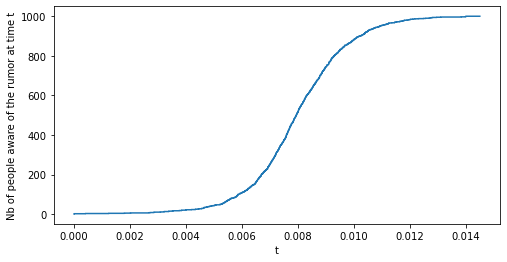

In [8]:
# Rumor spreading - Problem 3 

import numpy as np
import matplotlib.pyplot as plt

# The S matrix for problem 3 is given by
S = [1,2,3,4]
# The Q matrix for problem 3 is given by
Q = [[-3,3,0,0],
     [0,4,-4,0],
     [0,0,3,-3],
     [0,0,0,-1]]

# Generalize with an arbitrary number of people, but take 4 for our example
N_people = 1000
# This process is very easy to model indeed the only trajectory is 1->2->3->4 and only the times are random
xtraj = [i for i in range(1,N_people+1)]

tjumps = np.zeros(N_people)
tjumps[0] = 0

# creating the random times
for k in range(1,N_people):
    rate = k*(N_people-k) # If k people know, each one of these k can spread the rumor among N-k unaware people. 
    tjumps[k] = tjumps[k-1] + np.random.exponential(1/rate)
    
# Plot the process
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("t")
ax.set_ylabel("Nb of people aware of the rumor at time t")
plt.plot(tjumps, xtraj, drawstyle='steps-pre')

2. Simulate a birth death process with birth rate $\lambda$ and death rate $\mu$ (the state space is infinite so we cannot define the matrix $Q$, but we can still use a similar algorithm by simulating the time of the next jump and if it is a birth or a death event).

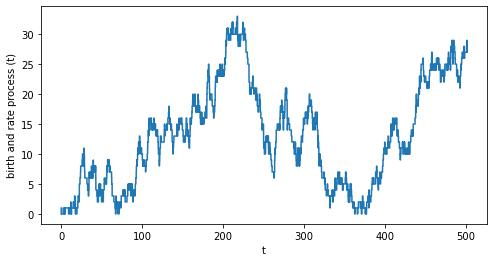

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# specify global variables
nsteps = 1000             # number of transitions to simulate

lmbda = 1 # birth rate
mu = 1 # death rate

N = [0] # this is our CTMC
tjumps = np.zeros(nsteps)        # record the jump times
tjumps[0] = 0 


for step in range(1,nsteps):
    # determine what event occurs: mutation A->B or division and mutation B-> 2A
    
    rate = lmbda + mu
    p = lmbda/(lmbda + mu) #probability of a birth
    
    if N[-1] == 0: #If there is nobody only a birth can happen
        p = 1
        rate = 1/lmbda
        
    ber = np.random.binomial(1,p) #does a birth happen before a death?
    
    if ber == 1: # birth
        N.append(N[-1]+1)
    if ber == 0: # death
        N.append(N[-1]-1)
    tjumps[step] = tjumps[step-1] + np.random.exponential(1/rate)
        

# plot the trajectory

fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("t")
ax.set_ylabel("birth and rate process (t)")
plt.plot(tjumps, N, drawstyle='steps-pre')